In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import momi
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40


In [9]:
model = PTA.DemographicModel("expanding")
model.set_param("project_dir", "./analysis/14samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 14)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding            ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/14samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
14                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_p

In [3]:
sim_df = pd.read_csv("./analysis/14samps_expanding_sims/expanding-SIMOUT.csv", sep=" ")
print(len(sim_df))
sfs_cols = [col for col in sim_df.columns if col.startswith("pop")]
params_cols = [col for col in sim_df.columns if col not in sfs_cols]
display(sim_df[sfs_cols].head())
display(sim_df[params_cols].head())

16002


,pop0-[[13__1]],pop0-[[12__2]],pop0-[[11__3]],pop0-[[10__4]],pop0-[[9_5]],pop0-[[8_6]],pop0-[[7_7]],pop1-[[13__1]],pop1-[[12__2]],pop1-[[11__3]],pop1-[[10__4]],pop1-[[9_5]],pop1-[[8_6]],pop1-[[7_7]],pop2-[[13__1]],pop2-[[12__2]],pop2-[[11__3]],pop2-[[10__4]],pop2-[[9_5]],pop2-[[8_6]],pop2-[[7_7]],pop3-[[13__1]],pop3-[[12__2]],pop3-[[11__3]],pop3-[[10__4]],pop3-[[9_5]],pop3-[[8_6]],pop3-[[7_7]],pop4-[[13__1]],pop4-[[12__2]],pop4-[[11__3]],pop4-[[10__4]],pop4-[[9_5]],pop4-[[8_6]],pop4-[[7_7]],pop5-[[13__1]],pop5-[[12__2]],pop5-[[11__3]],pop5-[[10__4]],pop5-[[9_5]],pop5-[[8_6]],pop5-[[7_7]],pop6-[[13__1]],pop6-[[12__2]],pop6-[[11__3]],pop6-[[10__4]],pop6-[[9_5]],pop6-[[8_6]],pop6-[[7_7]],pop7-[[13__1]],pop7-[[12__2]],pop7-[[11__3]],pop7-[[10__4]],pop7-[[9_5]],pop7-[[8_6]],pop7-[[7_7]]
0,0.229,0.158,0.139,0.135,0.127,0.136,0.076,0.221,0.169,0.154,0.132,0.121,0.134,0.068,0.258,0.157,0.143,0.125,0.141,0.121,0.056,0.228,0.156,0.164,0.131,0.121,0.132,0.068,0.207,0.170,0.169,0.124,0.118,0.136,0.076,0.247,0.195,0.137,0.132,0.118,0.109,0.062,0.255,0.178,0.134,0.115,0.120,0.126,0.073,0.192,0.167,0.127,0.160,0.157,0.131,0.067
1,0.215,0.149,0.165,0.144,0.135,0.135,0.057,0.235,0.176,0.116,0.121,0.147,0.130,0.075,0.213,0.164,0.135,0.146,0.136,0.142,0.065,0.204,0.176,0.170,0.125,0.117,0.123,0.084,0.227,0.172,0.144,0.130,0.123,0.148,0.056,0.220,0.167,0.140,0.160,0.115,0.135,0.062,0.236,0.156,0.141,0.140,0.150,0.128,0.048,0.252,0.189,0.155,0.125,0.119,0.097,0.064
2,0.222,0.166,0.135,0.138,0.135,0.149,0.056,0.219,0.179,0.142,0.141,0.138,0.115,0.066,0.214,0.179,0.135,0.145,0.131,0.133,0.063,0.208,0.171,0.150,0.140,0.140,0.128,0.062,0.200,0.176,0.166,0.148,0.139,0.117,0.054,0.209,0.171,0.146,0.137,0.135,0.129,0.073,0.213,0.168,0.148,0.146,0.124,0.126,0.075,0.249,0.193,0.162,0.121,0.114,0.106,0.056
3,0.198,0.159,0.170,0.138,0.128,0.134,0.073,0.182,0.168,0.160,0.155,0.141,0.135,0.059,0.224,0.153,0.162,0.142,0.141,0.113,0.065,0.185,0.161,0.161,0.135,0.152,0.151,0.054,0.281,0.187,0.141,0.137,0.109,0.095,0.049,0.251,0.162,0.161,0.139,0.115,0.121,0.052,0.200,0.183,0.113,0.150,0.135,0.133,0.086,0.284,0.182,0.149,0.121,0.096,0.118,0.051
4,0.182,0.156,0.156,0.149,0.136,0.145,0.077,0.208,0.151,0.157,0.134,0.155,0.136,0.059,0.213,0.181,0.140,0.131,0.142,0.134,0.058,0.254,0.170,0.137,0.128,0.134,0.114,0.063,0.253,0.193,0.154,0.114,0.112,0.114,0.059,0.248,0.189,0.151,0.135,0.114,0.119,0.044,0.202,0.171,0.151,0.165,0.129,0.125,0.057,0.189,0.178,0.167,0.155,0.129,0.132,0.050


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
0,0.508,4,1,737591,0.0,485901.600,253653.045,0.056,-1.679,466981.0,494037.0,9.816,5.736,0.559,-0.945,9.310,7.061,505567.750,231036.821,0.204,-0.748,468657.0,200412.00
1,0.835,7,1,684412,0.0,437876.000,246536.000,0.000,-2.000,437876.0,246536.0,13.335,6.361,0.000,-2.000,13.335,6.361,547068.250,264970.066,0.559,-1.074,481066.0,315128.75
2,0.699,6,1,267313,0.0,241160.000,167658.136,-0.230,-1.500,267313.0,204085.5,8.437,1.350,0.588,-1.500,7.823,1.566,434363.750,241702.108,-0.234,-1.653,494396.5,508420.75
3,0.467,4,1,380661,0.0,653152.200,358087.838,-0.603,-1.391,895108.0,572021.0,13.096,3.197,-0.123,-0.954,13.592,3.144,491355.625,195760.459,-0.427,-0.610,510013.5,185138.25
4,0.113,1,0,795142,0.0,514809.375,175651.022,-0.136,-0.904,517989.5,233975.0,12.433,6.269,-0.578,-1.272,14.942,9.773,768329.125,177772.869,-0.439,-1.365,824076.0,323124.75


In [5]:
from sklearn.ensemble import RandomForestRegressor
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
# This is super dumb
sim_df = pd.read_csv("./analysis/14samps_expanding_sims/expanding-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)


Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-13 11:18:37.045666
Predict() finished: 2021-09-13 11:19:25.659704
                             MAE         RMSE    vscore        R2
zeta                    0.205432     0.001718  0.293491  0.293438
zeta_e                  1.653023     0.013915  0.297425  0.297370
psi                     0.273069     0.002543  0.146923  0.146892
t_s                189828.111960  1652.150364  0.333967  0.333859
omega                  26.186065    10.285709 -0.001802 -0.001802
taus_mean          103257.972328   944.214467  0.230805  0.230651
taus_std            70235.485226   626.869089  0.195359  0.195329
taus_skewness     

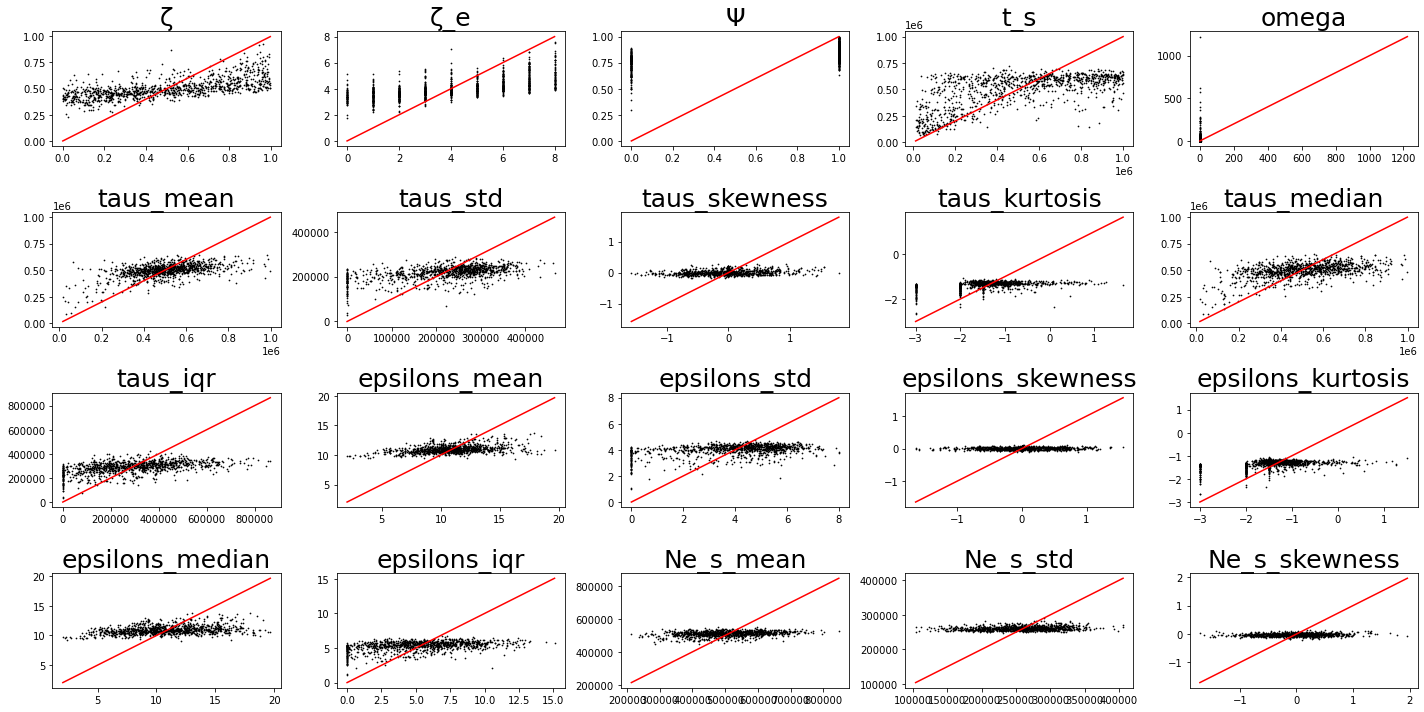

In [10]:
sim_df = pd.read_csv("./analysis/14samps_expanding_sims/expanding-SIMOUT.csv", sep=" ")
print(len(sim_df))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

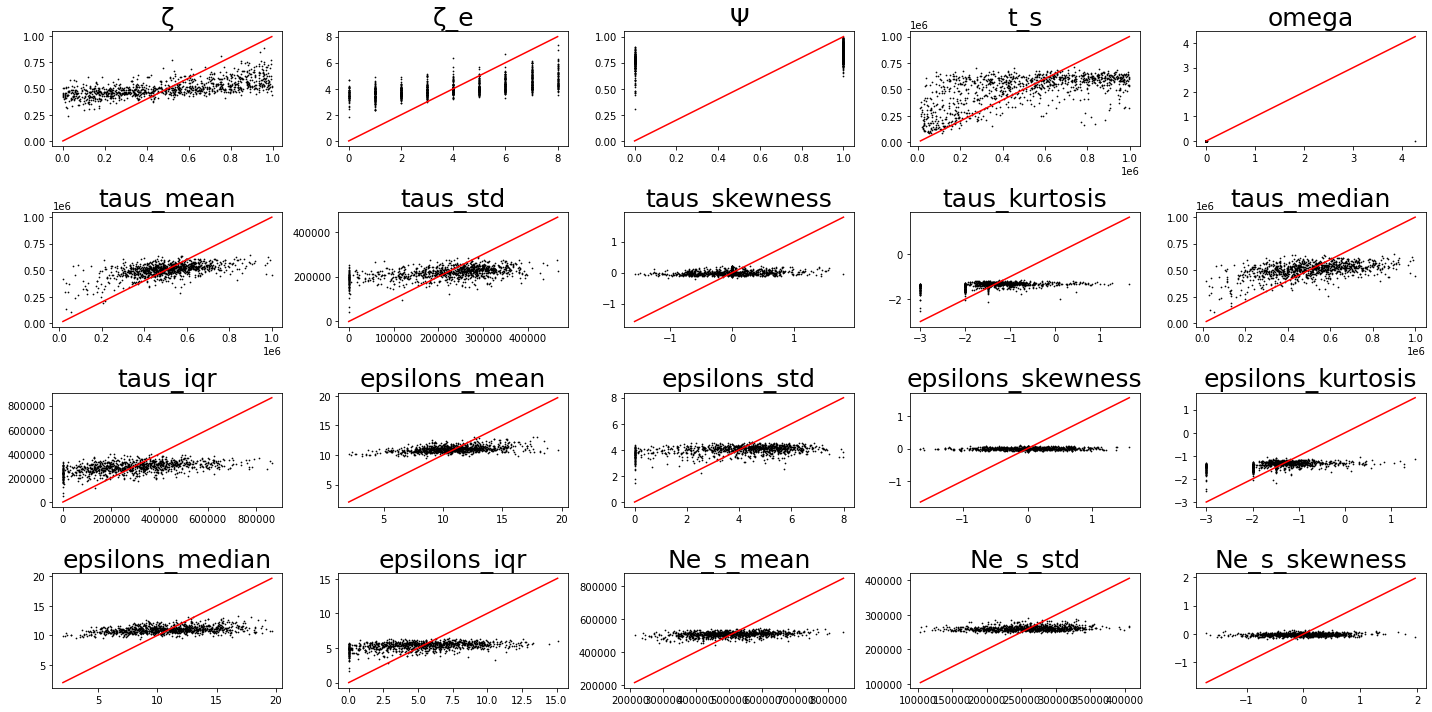

In [15]:
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

In [48]:
sim_df1[sim_df1["omega"]>0]

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr,pop0-[[13__1]],pop0-[[12__2]],pop0-[[11__3]],pop0-[[10__4]],pop0-[[9_5]],pop0-[[8_6]],pop0-[[7_7]],pop1-[[13__1]],pop1-[[12__2]],pop1-[[11__3]],pop1-[[10__4]],pop1-[[9_5]],pop1-[[8_6]],pop1-[[7_7]],pop2-[[13__1]],pop2-[[12__2]],pop2-[[11__3]],pop2-[[10__4]],pop2-[[9_5]],pop2-[[8_6]],pop2-[[7_7]],pop3-[[13__1]],pop3-[[12__2]],pop3-[[11__3]],pop3-[[10__4]],pop3-[[9_5]],pop3-[[8_6]],pop3-[[7_7]],pop4-[[13__1]],pop4-[[12__2]],pop4-[[11__3]],pop4-[[10__4]],pop4-[[9_5]],pop4-[[8_6]],pop4-[[7_7]],pop5-[[13__1]],pop5-[[12__2]],pop5-[[11__3]],pop5-[[10__4]],pop5-[[9_5]],pop5-[[8_6]],pop5-[[7_7]],pop6-[[13__1]],pop6-[[12__2]],pop6-[[11__3]],pop6-[[10__4]],pop6-[[9_5]],pop6-[[8_6]],pop6-[[7_7]],pop7-[[13__1]],pop7-[[12__2]],pop7-[[11__3]],pop7-[[10__4]],pop7-[[9_5]],pop7-[[8_6]],pop7-[[7_7]]
30,0.933,7,1,73202,0.010,75982.500,2780.500,0.000,-2.0,75982.5,2780.5,3.697,0.682,0.000,-2.0,3.697,0.682,575281.250,261171.643,-0.113,-0.769,542020.0,319956.50,0.296,0.180,0.144,0.130,0.102,0.102,0.045,0.295,0.195,0.139,0.118,0.099,0.102,0.051,0.302,0.176,0.143,0.131,0.111,0.091,0.046,0.309,0.183,0.141,0.119,0.101,0.106,0.041,0.295,0.189,0.139,0.128,0.105,0.100,0.045,0.291,0.183,0.139,0.127,0.113,0.103,0.043,0.306,0.189,0.137,0.122,0.104,0.102,0.040,0.286,0.194,0.135,0.129,0.102,0.100,0.054
219,0.805,6,1,312642,0.001,344465.667,22608.281,-0.678,-1.5,357705.0,25204.0,13.679,3.919,-0.693,-1.5,16.128,4.305,631470.875,189158.626,0.237,-0.903,631354.5,193515.00,0.232,0.174,0.156,0.132,0.118,0.127,0.062,0.212,0.176,0.159,0.139,0.130,0.127,0.057,0.211,0.170,0.144,0.146,0.134,0.125,0.069,0.215,0.183,0.141,0.139,0.128,0.120,0.075,0.214,0.173,0.156,0.151,0.122,0.126,0.058,0.224,0.157,0.154,0.138,0.125,0.131,0.071,0.192,0.162,0.154,0.140,0.147,0.127,0.078,0.207,0.166,0.170,0.121,0.136,0.133,0.067
316,0.814,7,1,390986,0.004,381354.000,9632.000,0.000,-2.0,381354.0,9632.0,8.421,3.619,-0.000,-2.0,8.421,3.619,468673.250,220765.562,0.150,-0.584,419284.5,242761.25,0.199,0.177,0.148,0.150,0.137,0.131,0.057,0.202,0.164,0.150,0.133,0.145,0.140,0.066,0.186,0.171,0.148,0.150,0.132,0.138,0.075,0.208,0.171,0.137,0.147,0.139,0.119,0.080,0.212,0.142,0.138,0.148,0.132,0.145,0.083,0.200,0.166,0.160,0.137,0.140,0.125,0.071,0.216,0.154,0.150,0.143,0.126,0.144,0.067,0.279,0.213,0.145,0.123,0.120,0.087,0.032
400,0.818,7,1,281420,0.009,275974.500,5445.500,0.000,-2.0,275974.5,5445.5,10.382,0.260,0.000,-2.0,10.382,0.260,488806.375,326628.787,0.322,-1.309,395865.5,517709.50,0.234,0.189,0.158,0.143,0.120,0.112,0.045,0.238,0.191,0.147,0.134,0.115,0.114,0.061,0.233,0.190,0.147,0.138,0.120,0.119,0.053,0.233,0.180,0.152,0.131,0.126,0.112,0.065,0.239,0.191,0.148,0.128,0.125,0.110,0.058,0.240,0.182,0.157,0.130,0.117,0.112,0.063,0.239,0.180,0.157,0.134,0.124,0.110,0.056,0.198,0.172,0.159,0.141,0.135,0.131,0.062
402,0.877,7,1,64714,4.269,64591.000,123.000,0.000,-2.0,64591.0,123.0,11.426,6.096,0.000,-2.0,11.426,6.096,387691.500,340753.384,0.483,-1.361,274740.0,593665.00,0.183,0.170,0.180,0.134,0.138,0.126,0.069,0.177,0.162,0.159,0.147,0.124,0.159,0.072,0.201,0.172,0.157,0.159,0.123,0.117,0.072,0.181,0.152,0.156,0.135,0.151,0.155,0.069,0.173,0.161,0.164,0.151,0.137,0.145,0.068,0.197,0.159,0.160,0.138,0.153,0.127,0.066,0.171,0.186,0.147,0.162,0.124,0.141,0.069,0.221,0.162,0.137,0.139,0.170,0.112,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11724,0.904,7,1,548603,0.003,561623.000,13020.000,0.000,-2.0,561623.0,13020.0,7.337,3.140,0.000,-2.0,7.337,3.140,670031.375,312729.173,

## Sorted summary statistics

In [17]:
model = PTA.DemographicModel("expanding-sorted")
model.set_param("project_dir", "./analysis/14samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 14)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted     ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/14samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
14                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_p

12000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-14 04:45:26.000891
Predict() finished: 2021-09-14 04:46:00.369289
                             MAE         RMSE    vscore        R2
zeta                    0.181488     0.001725  0.429858  0.429842
zeta_e                  1.460061     0.013933  0.437751  0.437735
psi                     0.276964     0.002891  0.133542  0.133537
t_s                203573.124285  1954.225982  0.257591  0.257588
omega                  67.892923    32.020437 -0.003777 -0.003778
taus_mean          101870.027411  1036.419459  0.265782  0.265761
taus_std            66513.272196   665.295074  0.283448  0.283428
taus_skewnes

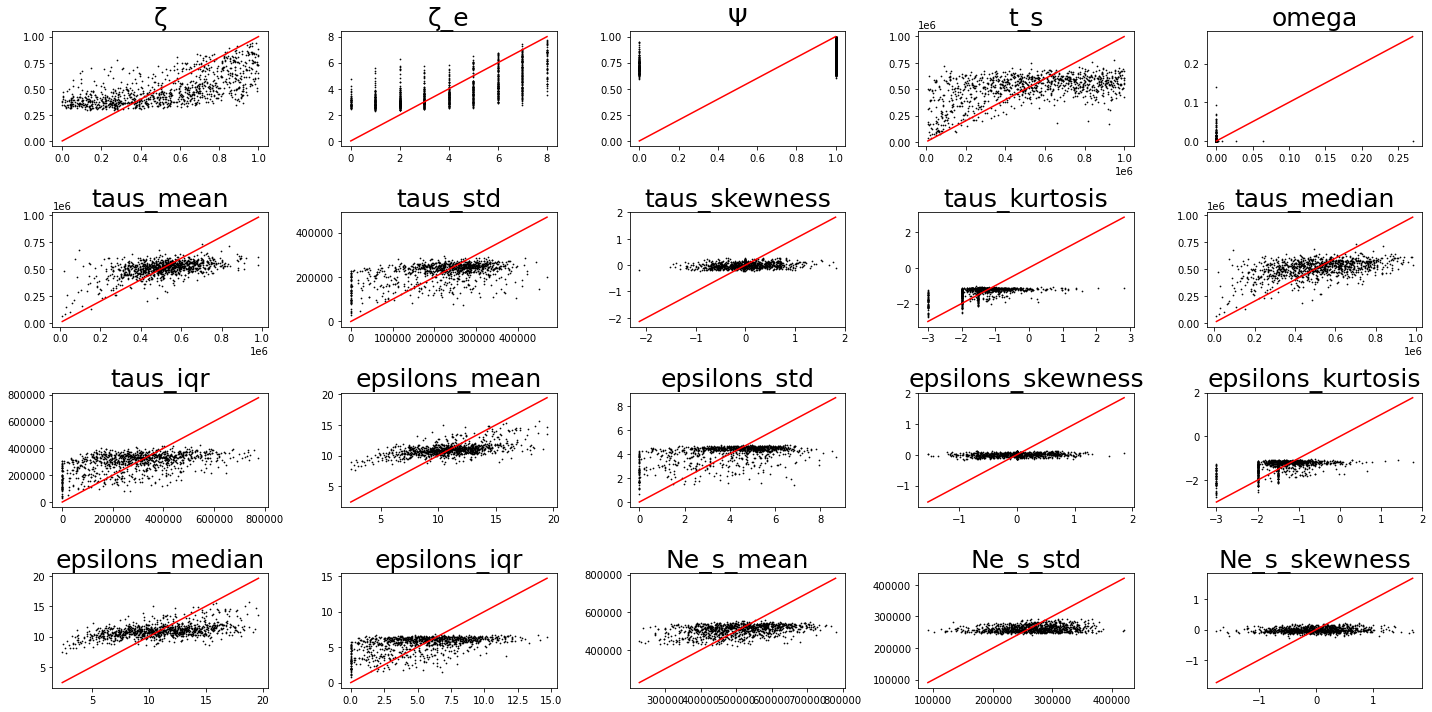

In [18]:
print(len(sim_df1))
sim_df1 = pd.read_csv("./analysis/14samps_expanding_sims/expanding-sorted-SIMOUT.csv", sep=" ")
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

## Trash below here

In [47]:
model.simulate(nsims=1, quiet=False, verbose=False)

    Generating 1 simulation(s).
  [                    ]   0%  Performing Simulations    | 0:00:00 | > /home/isaac/PTA/PTA/demography.py(577)serial_simulate()
    575                 ## pulses, then this will have to change
    576                 import pdb; pdb.set_trace()
--> 577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
    578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)

ipdb> n
> /home/isaac/PTA/PTA/demography.py(578)serial_simulate()
    576                 import pdb; pdb.set_trace()
    577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
--> 578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)
    580 

i

In [41]:
import itertools
import numpy as np

def _sample_tau(ntaus=1, pops_per_tau=[6, 1, 1]):
    tau = (1000, 10000)
    if isinstance(tau, tuple):
        tau = (tau[0], tau[1]+1)
    else:
        tau = (tau, tau+1)
    taus = [[np.random.randint(tau[0], tau[1], 1)[0]] * x for x in pops_per_tau]
    return taus
ts = _sample_tau(pops_per_tau=[5,1,1,1])
ts = np.array(itertools.chain.from_iterable(ts))
ts

array(<itertools.chain object at 0x7fc9dee12940>, dtype=object)

[5, 5, 5, 5, 5]